In [1]:
import pandas as pd 
import numpy as np 

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5973,2324-EFHVG,Male,0,No,No,64,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),104.40,6692.65,No
80,5919-TMRGD,Female,0,No,Yes,1,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.35,79.35,Yes
2045,7519-JTWQH,Female,0,No,No,69,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.50,7455.45,No
6806,4933-BSAIP,Female,0,Yes,No,40,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.10,780.1,No
4877,4973-RLZVI,Female,0,No,No,30,Yes,No,DSL,Yes,...,Yes,Yes,Yes,No,One year,No,Credit card (automatic),74.65,2308.6,No


In [3]:
data.drop('customerID' , axis = 'columns' , inplace=True)
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
pd.to_numeric(data['TotalCharges'] , errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [5]:
data[pd.to_numeric(data['TotalCharges'] , errors = 'coerce').isnull()]
data.shape

(7043, 20)

In [6]:
data = data[data.TotalCharges != ' ']
data.shape

(7032, 20)

In [7]:
data.iloc[:]['TotalCharges'] = pd.to_numeric(data.TotalCharges)
data.TotalCharges.isnull().sum()

0

In [8]:
data.TotalCharges.dtype

dtype('O')

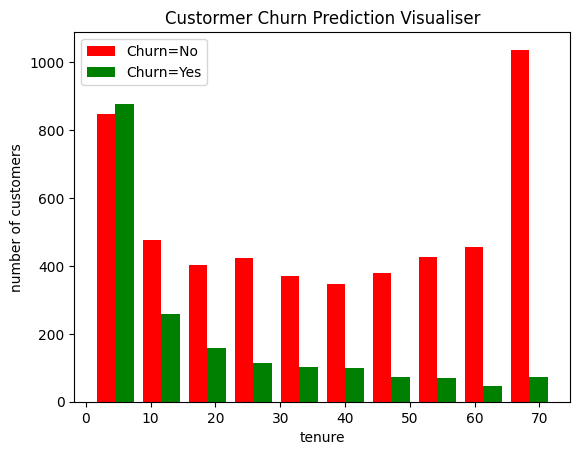

In [9]:
import matplotlib.pyplot as plt
tenure_churn_no = data[data.Churn == 'No'].tenure
tenure_churn_yes = data[data.Churn == 'Yes'].tenure
plt.xlabel('tenure')
plt.ylabel('number of customers')
plt.title('Custormer Churn Prediction Visualiser')
plt.hist([tenure_churn_no , tenure_churn_yes] , color = ['red' , 'green'] , label = ['Churn=No' , 'Churn=Yes'])
plt.legend()

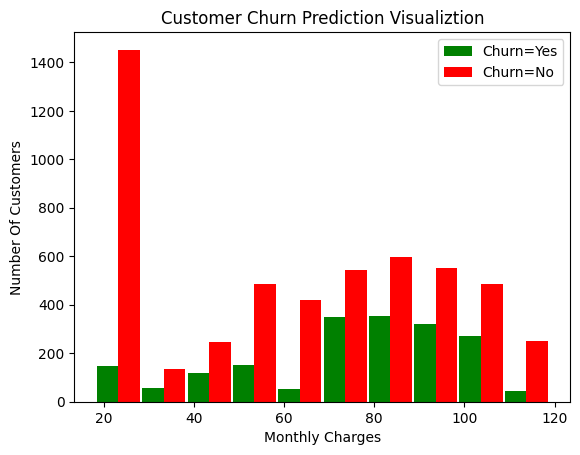

In [10]:
mc_churn_no = data[data.Churn=='No'].MonthlyCharges      
mc_churn_yes = data[data.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [11]:
def print_unique_values(data):
    for c in data : 
        if data[c].dtype == 'object':
            print(f'{c} : {data[c].unique()}')

In [12]:
data.replace('No internet service' , 'No' , inplace=True)
data.replace('No phone service' , 'No' , inplace=True)

print_unique_values(data)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [13]:
yes_no_columns = ['Partner' , 'Dependents' , 'PhoneService' , 'MultipleLines' , 'InternetService' , 'OnlineSecurity' , 'OnlineBackup' , 'DeviceProtection' , 'TechSupport' , 'StreamingTV' , 'StreamingMovies' , 'PaperlessBilling']


In [14]:
for col in yes_no_columns : 
    data[col].replace({'Yes' : 1 , "No" : 0} , inplace = True)

In [15]:
for col in data : 
    print(f'{col} : {data[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 0]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [16]:
data['gender'].replace({'Female' : 0 , 'Male' : 1} , inplace = True)

In [17]:
data = pd.get_dummies(data = data , columns = ['InternetService' , 'Contract' , 'PaymentMethod'])

In [18]:
data.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6677,0,0,0,0,13,0,0,0,1,0,...,False,True,False,True,False,False,False,False,True,False
1505,1,1,0,0,1,1,1,0,0,0,...,False,False,True,True,False,False,False,False,True,False
5204,1,1,1,0,38,0,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [19]:
data.replace(True , 1 , inplace=True)
data.replace(False , 0 , inplace=True)

In [20]:
data.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                       object
InternetService_0                            int64
InternetService_DSL                          int64
InternetService_Fiber optic    

In [21]:
data.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3667,0,1,1,1,24,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
6159,0,0,0,1,2,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
2892,1,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [22]:
col_to_scale = ['tenure' , 'MonthlyCharges' , 'TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[col_to_scale] = scaler.fit_transform(data[col_to_scale])

In [23]:
data.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5963,1,0,1,1,0.295775,1,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
2318,0,0,1,1,0.985915,1,1,1,1,1,...,0,0,1,0,0,1,1,0,0,0
3815,0,0,0,0,0.028169,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
894,0,0,1,0,0.873239,1,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
807,1,0,1,0,0.985915,1,1,1,0,1,...,0,0,1,0,0,1,0,1,0,0


In [24]:
for col in data : 
    print(f'{col} : {data[col].unique()}')


#HERE OUR DATASET IS READY TO BE PROCESSED !

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [25]:
x = data.drop('Churn' , axis = 'columns')
# data.replace({} , inplace=True)
data['Churn'].replace({'Yes' : 1 , 'No' : 0}, inplace=True)
y = data['Churn']
data.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            int64
InternetService_DSL                          int64
InternetService_Fiber optic    

In [26]:
from sklearn.model_selection import train_test_split 
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=5)

In [27]:
import tensorflow as tf 
from tensorflow import keras 

neuralNetwork = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

neuralNetwork.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

neuralNetwork.fit(x_train, y_train, epochs=100)



Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5290 - accuracy: 0.7404
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4441 - accuracy: 0.7872
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4273 - accuracy: 0.7959
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.8021
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4184 - accuracy: 0.8023
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4191 - accuracy: 0.8094
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8048
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8080
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8089
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4105 - accura

In [ ]:
from sklearn.metrics import classification_report
neuralNetwork.evaluate(x_test , y_test)
y_prediction = np.round(neuralNetwork.predict(x_test))
print(classification_report(y_prediction , y_test))

44/44 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85      1100
         1.0       0.48      0.64      0.55       307

    accuracy                           0.77      1407
   macro avg       0.68      0.72      0.70      1407
weighted avg       0.80      0.77      0.78      1407



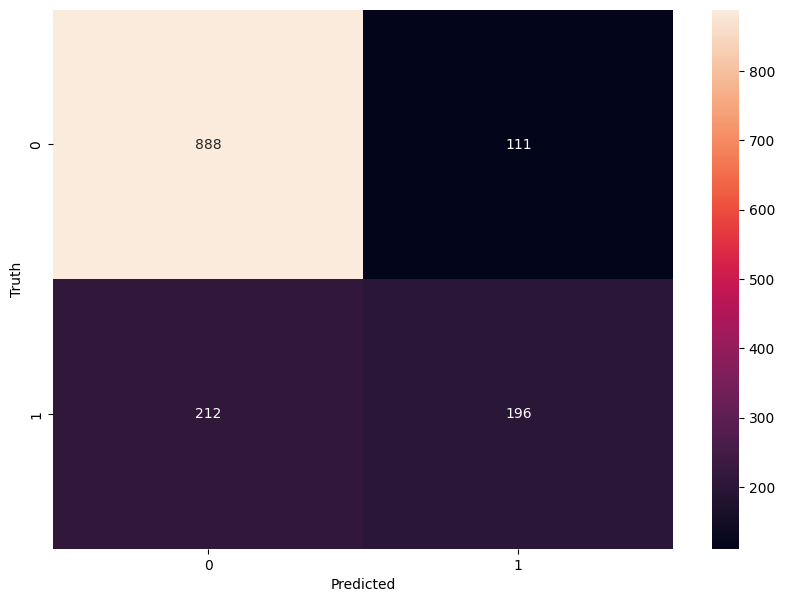

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_test , predictions = y_prediction)
plt.figure(figsize=(10,7))
sn.heatmap(cm , annot = True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
#Accuracy 
(888+196)/(888+196+212+111)

0.7704335465529495

In [ ]:
#Precesion for 0 class 
(888)/(888+111)

0.8888888888888888

In [ ]:
#precesion for 1 class
196/(196+212)

0.4803921568627451